<img src='https://wizardsourcer.com/wp-content/uploads/2019/03/Stackoverflow.png'></img>

<center><h1> A Data Analysis using Stackoverflow’s 2017 and 2018 Annual Developer Survey.</h1></center>

## This analysis is done using stackoverflow's 2017 and 2018 Annual Developer survey using the CRISP-DM process

### Made by Aditya

<h2>Objectives</h2>

- How education may influence the salary?
- Gender Ratio of developers across the globe
- The rate of increase in salary with the years of experience
- More Language = More Money?

In [4]:
# Importing Libraries
# import python libraries to handle datasets
import pandas as pd

In [5]:
# Importing Dataset 
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

# Creating copies of original dataset
question_1 = df.copy(deep=True)
question_2 = df.copy(deep=True)
question_3 = df.copy(deep=True)
question_4 = df.copy(deep=True)
question_5 = df.copy(deep=True)
df.shape

(51392, 154)

In [6]:
def get_description(column_name, schema=schema):
    '''
    SUMMARY: 
            Returns the description of a column
    INPUT:
            schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT: 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

In [7]:
def grouping_function(data, column_name):
    """ 
    SUMMARY: 
            Returns a grouped dataframe
    
    INPUT: 
            data (object): 2-D Dataframe
            column_name (char): Column which is to be grouped by
  
    Returns: 
            GroupBy object with mean
    """
    
    grouped_df = data.groupby([column_name]).mean().reset_index()
    return grouped_df

In [8]:
def plot_graph(data, x_data, y_data):
    """ 
    SUMMARY: 
            Plot y versus x as lines and/or markers.
    
    INPUT: 
            data (object): 2-D Dataframe
            x_data (char): Data Column for x-axis
            y_data (char): Data Column for y-axis
  
    OUTPUT: 
            Axes Instance
    """
    
    ax = data.plot.barh(x=x_data, y=y_data, rot=0)
    return ax

<h2>1. How education may influence the salary?</h2>

We need to find the average salary of each education entry. Let's get the description of some relevant columns according to our requirement:

In [9]:
print(get_description('FormalEducation'))
print(get_description('Salary'))

Which of the following best describes the highest level of formal education that you've completed?
What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?


For this objective, **FormalEducation** and **Salary** column seems to be best fit to our need. So, we are going to go ahead with these two columns

In [10]:
result_1 = grouping_function(question_1, 'FormalEducation')
result_1[['FormalEducation', 'Salary']]

,FormalEducation,Salary
0,Bachelor's degree,56914.358553
1,Doctoral degree,78527.933053
2,I never completed any formal education,44430.660621
3,I prefer not to answer,38284.836141
4,Master's degree,58250.838766
5,Primary/elementary school,62677.337356
6,Professional degree,39503.658863
7,Secondary school,40395.148419
8,Some college/university study without earning ...,55912.810459


In [11]:
# Visualisation for objective 1
ax1 = plot_graph(result_1, 'FormalEducation', 'Salary')

**NaN Value:** NaN value in GroupBy are automatically excluded

**Summary:** The developers who own a Doctoral Degree get the highest salary of USD 78,527, followed by Primary/Elementary School graduates at USD 62,677 and Master's Degree holder at normal pay of USD 58,250.

<h2>2. Gender Ratio of developers across the globe</h2>

We want to get the total number of male and female in each country. Let's see the description of some relevant columns:

In [12]:
print(get_description('Gender'))
print(get_description('Country'))

Which of the following do you currently identify as?
In which country do you currently live?


We gonna use **Gender** and **Country** columns for this analysis.
After analyzing the **Gender** column, it has been found that there are some ambiguous data values in the column. Agree that data values associated with the effort or time an individual put into this survey, but for the sake of this analysis, we are going to use _Male_ and _Female_ data values only.

In [13]:
def gender_count(data, ambiguous_values):
    """     
    INPUT: 
            data (object): 2-D Dataframe
            ambiguous_values (list): Data values which is to be removed
  
    Returns: 
            Dataframe with 'Country', 'Male' and 'Female' Column
    """
    
    # Dropping NaN from Gender
    data.dropna(subset=['Gender'], inplace=True)
    
    # Filtering Ambiguous Values
    data = data[~data.Gender.str.contains('|'.join(ambiguous_values))]
    
    # Resetting Index
    data.reset_index(drop=True, inplace=True)
    data.drop(['Respondent'], axis=1)
    
    # Counting the number of male and female in each country and filling null values with 0
    pivoted_data = data.pivot_table(index='Country', columns='Gender', aggfunc='size', fill_value=0)
    
    # Creating Dataframe out of Pivot Table
    gender_df = pd .DataFrame({'Male': pivoted_data['Male'], 'Female': pivoted_data['Female']}, index=pivoted_data.index)
    return gender_df
    

In [14]:
# Considering only male and female
search_for = ['Gender non-conforming', 'Transgender; Gender non-conforming','Gender non-conforming; Other', 'Transgender; Other', 'Transgender', 'Other', 'Male; Female']

result_2 = gender_count(question_2, search_for)
result_2.head(10)

,Male,Female
Country,,
Afghanistan,9,1
Aland Islands,2,0
Albania,28,3
Algeria,15,1
Andorra,3,0
Angola,1,0
Antarctica,5,1
Antigua and Barbuda,3,0
Argentina,151,8


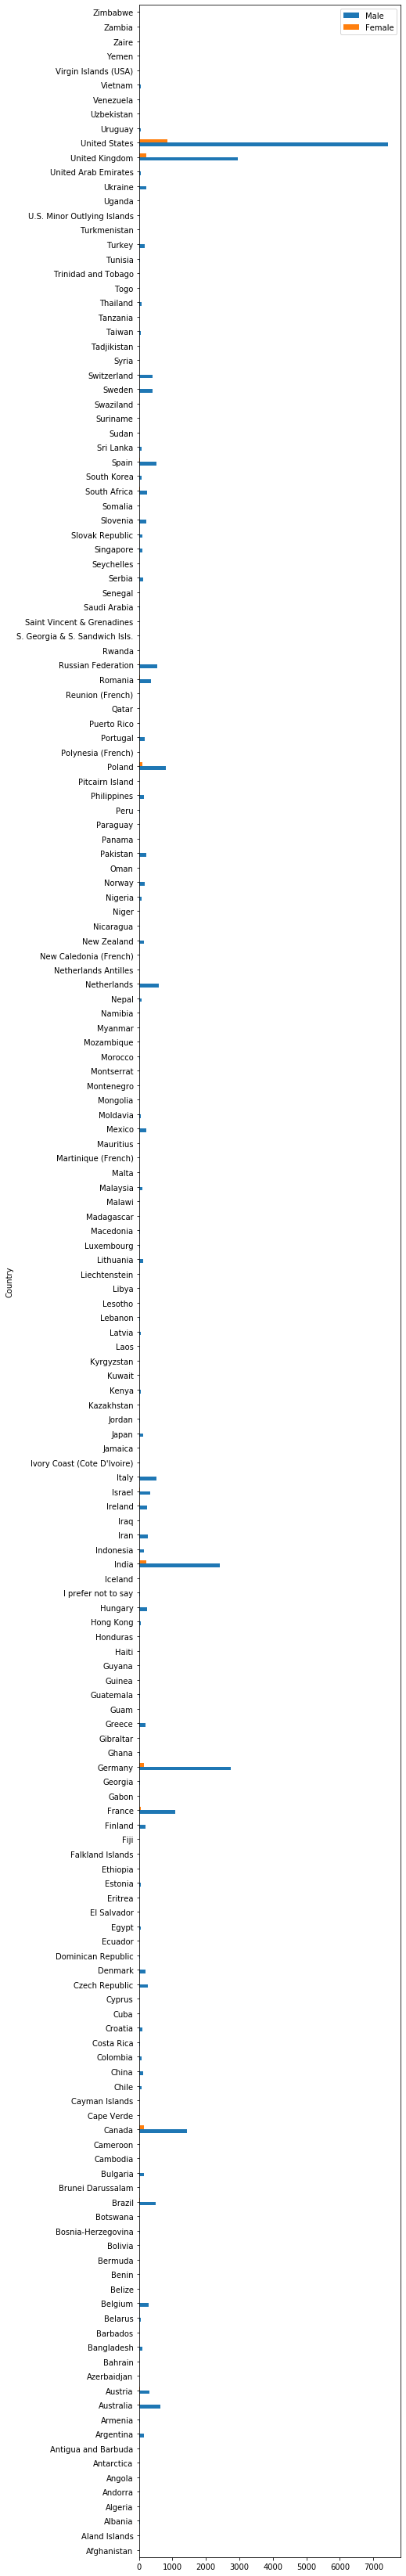

In [24]:
# Visualisation for objective 2
ax2 = result_2.plot.barh(rot=0, figsize=(6, 60))

**Dropped NaN Column:** Gender

**Removed Ambiguous Data Values: (Categorical Value)**

Gender non-conforming', 'Transgender; Gender non-conforming','Gender non-conforming; Other', 'Transgender; Other', 'Transgender', 'Other', 'Male; Female'

**Summary:** In this survey, only 2,600 females were recorded out of 34,189 responses which states that there are only 13 female developers over 100 male developers in the world as of 2017.

<h2>3. Rate of increase of salary with years of experience</h2>

First step is to choose the column of our need. Let's have a look on **YearsProgram** and **Salary** column:

In [16]:
print(get_description('YearsProgram'))
print(get_description('Salary'))

How long has it been since you first learned how to program?
What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?


Here we will use the year when any individual learned first program. Let's not confused it with the number of years an individual has been in the industry professionally. We will use our _groupby_ function to group the **YearsProgram** with the average of **Salary**

In [17]:
result_3 = grouping_function(question_3, 'YearsProgram')
result_3[['YearsProgram', 'Salary']]

,YearsProgram,Salary
0,1 to 2 years,33952.955892
1,10 to 11 years,48056.752718
2,11 to 12 years,54866.916054
3,12 to 13 years,55753.347727
4,13 to 14 years,57149.324680
5,14 to 15 years,63487.522662
6,15 to 16 years,62791.031631
7,16 to 17 years,63898.935647
8,17 to 18 years,73085.731295
9,18 to 19 years,71599.061950


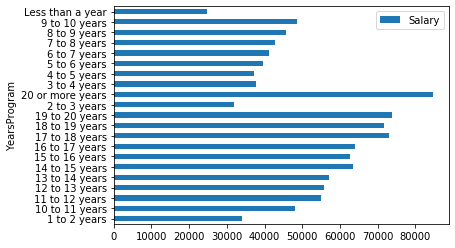

In [18]:
# Visualisation for objective 3
ax3 = plot_graph(result_3, 'YearsProgram', 'Salary')

**NaN Value:** NaN value in GroupBy are automatically excluded

**Summary:** With no surprise, the pattern is linear over the number of years of experience. Those very new to the tech industry, with less than a year of experience, can expect to get a normal pay of USD 24,673 (a year-over-year increment of 12.16 percent). Following a year or two, that normal pay hops to USD 33,953 (a whopping 37.6 percent expansion, year-over-year).

<h2> 4. More Languages = More Money? </h2>

Students at university level often confused with the fact that if you have mastered more than one languages, you will have some benefits in terms of salary. Let's figure out if they are right. Let's work with **HaveWorkedLanguage** and **Salary** column:

In [19]:
def lang_count(data):
    """     
    INPUT: 
            data (object): 2-D Dataframe
  
    Returns: 
            GroupBy object with mean
    """
    # Counting number of languages
    data['LanguageCount'] = data['HaveWorkedLanguage'].str.count(';') + 1

    # Dropping NaN in LanguageCount
    data.dropna(subset=['LanguageCount'], inplace=True)
    data.reset_index(drop=True, inplace=True)
    print('Responses:', data['Salary'].shape[0])

    # Grouping Salary according to number of languages
    grouped_salary = grouping_function(data, 'LanguageCount')

    # Dropping NaN in Salary
    grouped_salary.dropna(subset=['Salary'], inplace=True)
    grouped_salary.reset_index(drop=True, inplace=True)
    
    # Fitlering Outliers
    salary_quantile = grouped_salary["Salary"].quantile(0.1)
    
    # Considering the first 10 rows
    grouped_salary = grouped_salary[grouped_salary["Salary"] > salary_quantile].head(10)
    return grouped_salary

In [20]:
result_4 = lang_count(question_4)
result_4[['LanguageCount', 'Salary']]

Responses: 36625


,LanguageCount,Salary
0,1.0,53202.325036
1,2.0,57888.283987
2,3.0,55213.482484
3,4.0,58317.869749
4,5.0,59163.122613
5,6.0,58405.710495
6,7.0,58763.422530
7,8.0,57447.874539
8,9.0,53301.021354
9,10.0,58741.498670


<h4>Average Salary</h4>

In [21]:
print('Average Salary: ', result_4['Salary'].mean())

Average Salary:  57044.46114557163


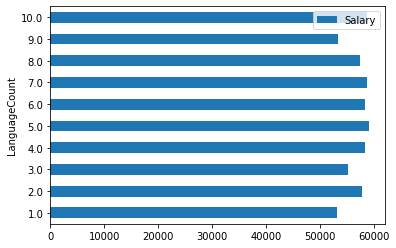

In [22]:
# Visualisation for objective 4
ax4 = plot_graph(result_4, 'LanguageCount', 'Salary')

**Dropped NaN Columns:** LanguageCount, Salary

**Summary:** It doesn't make much difference at all. A developer specialized in one programming language get a normal pay of USD 53,202 whereas the one who is skilled in 9 different languages get a normal compensation of USD 53,301 (0.18 percent more). So more Languages does not nessasarly mean more money..